In [1]:
# import relevant libraries
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
#import squarify
from functools import reduce

In [3]:
# loading the json file
with open(r'../../../data/open-data/data/events/7555.json', encoding='utf-8') as data_file:    
    data = json.load(data_file)

In [5]:
all_pol = pd.DataFrame()
for i in data_id:
    with open(r'../../../data/open-data/data/events/'+str(i)+'.json', encoding='utf-8') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    df['game_id'] = i
    if all_pol.empty:
        all_pol = df
    else:
        all_pol = pd.concat([all_pol, df], join = 'outer', sort = False)

In [13]:
df = all_pol.loc[all_pol['game_id'] == 7539]

In [23]:
df.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,pass_goal_assist,game_id,injury_stoppage_in_chain,clearance_aerial_won,miscontrol_aerial_won,50_50_outcome_id,50_50_outcome_name,block_deflection,block_save_block,dribble_nutmeg
0,24524cdd-b2c0-4b60-a87a-7b36442a982c,1,1,00:00:00.000,0,0,1,0.00,35,Starting XI,...,NaN,7539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0c3ae020-9b2b-443f-8f66-dc3efcaf8490,2,1,00:00:00.000,0,0,1,0.00,35,Starting XI,...,NaN,7539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13552a46-0a45-491f-8798-2b5347ea0692,3,1,00:00:00.000,0,0,1,8.84,18,Half Start,...,NaN,7539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,155720e4-b0fc-4fd3-b7e5-b8f27b14b638,4,1,00:00:00.000,0,0,1,8.84,18,Half Start,...,NaN,7539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,db8905c5-50df-4b22-bca5-eb98af75a07f,5,1,00:00:00.500,0,0,2,1.12,30,Pass,...,NaN,7539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)  

In [14]:
df_locations = df.loc[df['location'].isna() == False].copy()
df_locations[['location_x','location_y']] = pd.DataFrame(df_locations.location.values.tolist(), index= df_locations.index)
df_locations_pol = df_locations.loc[df['team_name'] == 'Poland'].copy()

In [15]:
avg_xy_pol = df_locations_pol.loc[df_locations_pol['play_pattern_name'] == 'Regular Play'].groupby('player_name').mean()[['location_x', 'location_y']]
avg_xy_pol.reset_index(inplace=True)

In [16]:
pass_pairs = df[['team_name', 'player_name', 'pass_recipient_name']].loc[df['pass_recipient_name'].isna() == False]
pass_counts = pass_pairs.groupby('player_name').count()
avg_xy_passcounts = pd.merge(pass_counts, avg_xy_pol, left_on='player_name', right_on='player_name')
pass_pairs_pol = pass_pairs.loc[pass_pairs['team_name'] == 'Poland'].groupby(['player_name','pass_recipient_name']).size().reset_index().rename(columns={0:'count'})

In [19]:
d1 = pd.merge(pass_pairs_pol, avg_xy_pol, left_on='player_name', right_on='player_name')
d2 = pd.merge(d1, avg_xy_pol, left_on='pass_recipient_name', right_on='player_name')
d3 = d2[['player_name_x', 'location_x_x', 'location_y_x', 
        'pass_recipient_name', 'location_x_y', 'location_y_y', 'count']].copy()

In [20]:
d3.rename(columns={
                    'player_name_x': 'player_name',
                    'location_x_x' : 'from_x', 
                   'location_y_x': 'from_y',
                  'location_x_y' : 'to_x', 
                  'location_y_y' : 'to_y'},
         inplace=True)

In [21]:
pass_data = d3.loc[d3['count']>5]

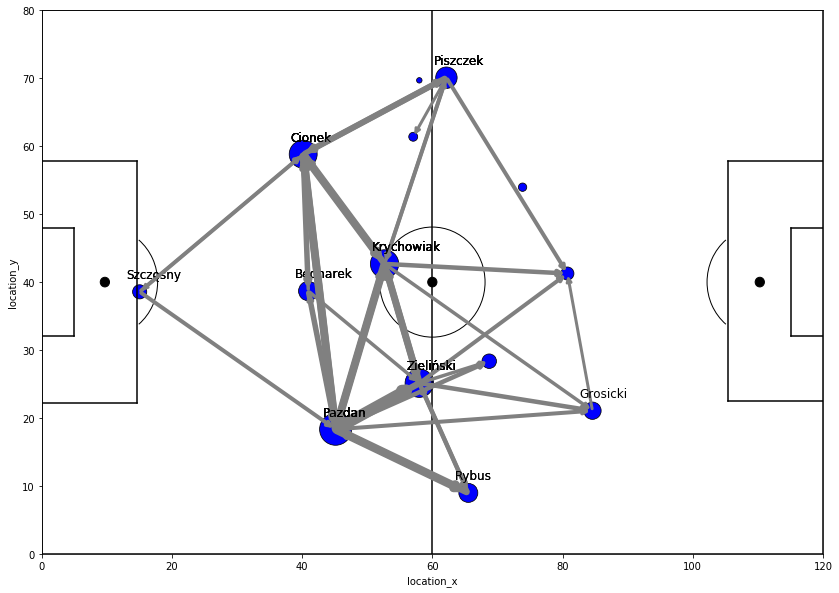

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax.set_xlim([0,120])
ax.set_ylim([0,80])

draw_pitch(ax)

for i in range(len(pass_data)):
    
    playername = pass_data.iloc[i]['player_name'].split(' ')[-1]

    ax.annotate('', xy = (pass_data.iloc[i]['to_x'], pass_data.iloc[i]['to_y']), 
           xytext = (pass_data.iloc[i]['from_x'], pass_data.iloc[i]['from_y']), 
           arrowprops=dict(arrowstyle="->", color = 'gray', linewidth=pass_data.iloc[i]['count']/2))


    ax.annotate(playername, xy = (pass_data.iloc[i]['from_x']-2, pass_data.iloc[i]['from_y']+2), size=12) 



sns.scatterplot(data=avg_xy_passcounts, x='location_x', y='location_y', color='blue', edgecolor='black',s=avg_xy_passcounts['team_name']*10)

# plt.savefig('passmap_pol-sen.png')
